# LOAN DEFAULT PREDICTION-ML

    Objective:
        The Loan Prediction Machine Learning Model is built to assist financial istitutions like banks, NBFC's, microfinance banks in automating the loan approval by predicting whether a loan application should be approved or rejected based on applicant details

Step 1: Import Dataset

Import Libraries

In [1]:
import pandas as pd     # to read dataset
import numpy as np      # to do mathematical operations

Read Dataset

In [2]:
df= pd.read_csv("loan_data.csv")        # reads dataset from csv file
df.head()       # shows top 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


    Numerical:
        ApplicantIncome	
        CoapplicantIncome
        LoanAmount	

    Categorical:
        Gender
        Married
        Dependents
        Education
        Self_Employed
        Credit_History
        Property_Area
        Loan_Status

Step 2: Data Cleaning and Preprocessing

In [3]:
df.info()       # shows information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
df.isnull().sum()       # shows total null values present in each column

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

    Inference:
        There is a presence of Null values in 'Gender','Dependents','Self Employed', 'Loan Amount Term', 'Credit History' columns
        These null values has to be either removed or imputed
        So we are going to impute by idxmax

In [5]:
df= df.drop(columns=["Loan_ID"])        # to remove particular column from dataset

In [6]:
df['LoanAmount']=pd.to_numeric(df['LoanAmount'], errors='coerce')       # converting null values of numerical column

In [ ]:
# remove unwanted warning messages
import warnings     
warnings.filterwarnings("ignore")

In [9]:
# converting null values by imputing
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().idxmax(), inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().idxmax(), inplace=True)
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)

In [10]:
df.isnull().sum()       # shows total null values in each column

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.head()       # to show top 5 rows after dropping column

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [12]:
df.info()       # shows information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [13]:
df.describe()       # describes basic statistical information

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,3579.845144,1277.275381,104.986877,341.417323,0.850394
std,1419.813818,2340.818114,28.358464,67.625957,0.357154
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


Outliers Detection and Handling

Import Libraries

In [14]:
import matplotlib.pyplot as plt     # importing visualization libraries

Applicant Income

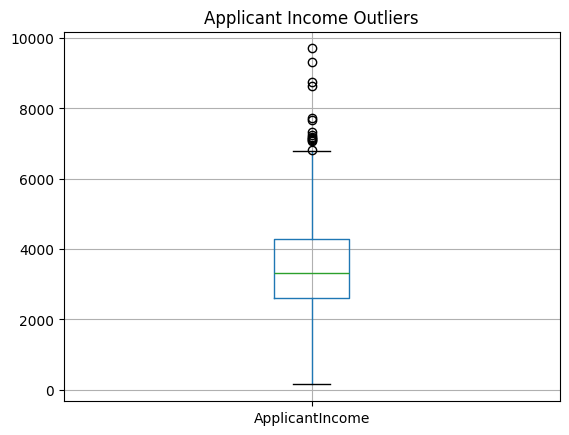

In [15]:
df.boxplot("ApplicantIncome")       # creates boxplot
plt.title("Applicant Income Outliers")      # shows title of chart
plt.show()      # shows the chart

    Inference:
        There is a presence of huge number of outliers in Applicant Income data
        These outliers are going to removed by Inter Quantile Range (IQR) method

Applicant Income- outlier removal

In [16]:
# outliers removed by Inter Quantile Range (IQR) method
Q1= df['ApplicantIncome'].quantile(0.25)
Q3= df['ApplicantIncome'].quantile(0.75)

IQR= Q3-Q1

lower= Q1- 0.5*IQR
upper= Q3-0.5*IQR

df_cleaned= df[(df['ApplicantIncome']>=lower) & (df['ApplicantIncome']<=upper)]

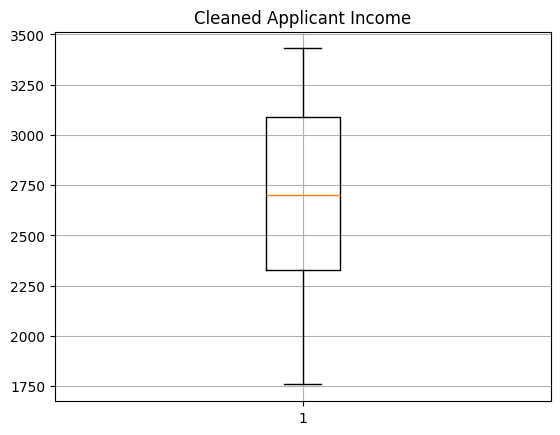

In [17]:
plt.boxplot(df_cleaned['ApplicantIncome'])      # creates box plot
plt.title("Cleaned Applicant Income")       # shows title of chart
plt.grid()      # shows grid lines
plt.show()      # shows the boxplot chart

    Inference:
        Now the outliers are completely removed
        The Applicant Income Column is purely becomes Normally distributed

Loan Amount

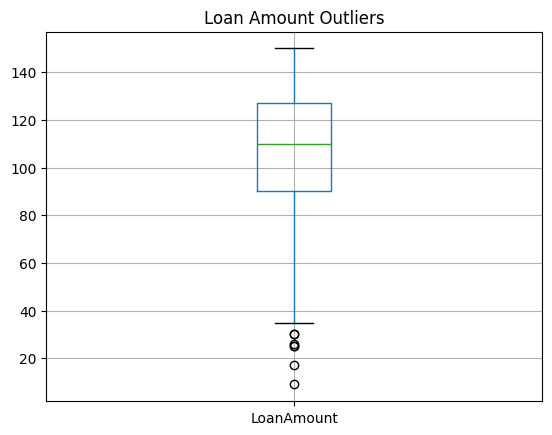

In [18]:
df.boxplot("LoanAmount")        # creates boxplot
plt.title("Loan Amount Outliers")       # shows title of chart
plt.show()      # shows entire chart

    Inference:
        The Loan Amount has some outliers in it
        This will affect the prediction of Loan approval status

Loan Status- Outlier Removal

In [19]:
# removal of outlier
Q1= df['LoanAmount'].quantile(0.25)
Q3= df['LoanAmount'].quantile(0.75)

IQR= Q3- Q1

lower= Q1-0.5*IQR
upper= Q3-0.5*IQR

df_cleaned= df[(df['LoanAmount']>=lower) & (df['LoanAmount']<=upper)]

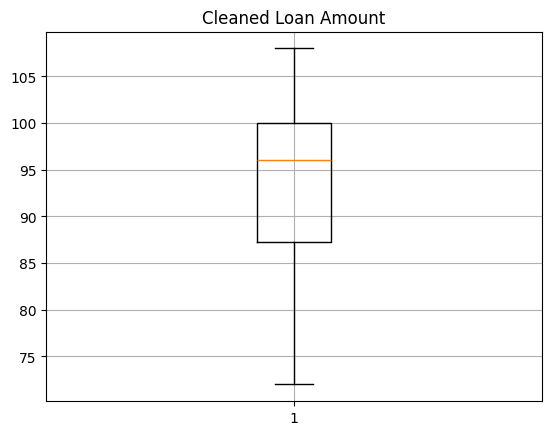

In [20]:
plt.boxplot(df_cleaned['LoanAmount'])       # creates box plot
plt.title("Cleaned Loan Amount")        # shows title of chart
plt.grid()      # shows grid lines in chart
plt.show()      # shows entire graph

    Inference:
        The Loan Amount column is completely cleaned
        This process is done by Inter Quantile Range (IQR) method

Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder      # import label encoder

In [22]:
# to do encoding of categorical data
le= LabelEncoder()
for col in ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']:

    df[col]=le.fit_transform(df[col].astype(str))

In [23]:
df.head()       # shows top 5 rows of cleaned and processed data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1,2,1


In [24]:
df.info()       # shows information of processed dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    int64  
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 35.8 KB


    Inference:
        The dataset is now completey cleaned and encoded for building models

Step 3: Build Model

    Inference:
        The given problem is identified as classification problem.
        So we are going with Supervised Learning Model with classification models

Import Libraries

In [25]:
from sklearn.model_selection import train_test_split        # to split train data and test data
from sklearn.preprocessing import StandardScaler        # importing standard scaler

# supervised learning
from sklearn.neighbors import KNeighborsClassifier      # importing KNeighbours libraray
from sklearn.linear_model import LogisticRegression     # importing linear model library
from sklearn.ensemble import RandomForestClassifier     # importing RandomForest classifier
from sklearn.tree import DecisionTreeClassifier     # importing Decision tree classifier
from xgboost import XGBClassifier     # importing XGBoost Classifier
from sklearn.svm import SVC     # importing Support vector Classifier

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,precision_score        # importing Evaluation metrics

In [26]:
df['Loan_Status'].value_counts()        # shows total counts

Loan_Status
1    271
0    110
Name: count, dtype: int64

    Inference:
        The dataset is imbalanced.
        We need to balance the dataset to avoid bias.
        So using SMOTE technique

In [27]:
from imblearn.over_sampling import SMOTE        # to balance the imbalanced data

Define Features

In [28]:
X= df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]     # define input data
y= df["Loan_Status"]        # defines target data

Train-test Split

In [29]:
X_train, X_test, y_train,y_test= train_test_split(X, y, random_state=42, test_size=0.2)     # train test split in 80:20 ratio

Scaling and Balancing Dataset

In [30]:
# scaling the input features
scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [31]:
# to balance the imbalanced data
smote= SMOTE()
X_train,y_train= smote.fit_resample(X_train,y_train)

(1) RandomForestClassifier

In [32]:
model= RandomForestClassifier()     # select model as RandomForestClassifier
model.fit(X_train,y_train)      # Fit the model

RandomForestClassifier()

Prediction

In [33]:
y_pred_rf= model.predict(X_test)        # Predict the model

Evaluation

In [ ]:
acc= accuracy_score(y_pred_rf,y_test)       # to evaluate accuracy score
precision= precision_score(y_pred_rf,y_test)        # to calculate precision score
conf_mat= confusion_matrix(y_pred_rf,y_test)        # to calculate confusion matrix
class_rep= classification_report(y_pred_rf,y_test)      # to prepare classification report

In [ ]:
print(f'Accuracy:{acc:.2f}')        # shows accuracy of model
print(f'Precision:{precision:.2f}')     # shows precision score
print(f'{conf_mat}')        # shows confusion matrix
print(f'{class_rep}')       # shows classification report

Accuracy:0.79
Precision:0.96
[[ 7  2]
 [14 54]]
              precision    recall  f1-score   support

           0       0.33      0.78      0.47         9
           1       0.96      0.79      0.87        68

    accuracy                           0.79        77
   macro avg       0.65      0.79      0.67        77
weighted avg       0.89      0.79      0.82        77



(2) DecisionTreeClassifier

In [37]:
model1= DecisionTreeClassifier()        # select model as Decision Tree Classifier
model1.fit(X_train,y_train)     # fit the model

DecisionTreeClassifier()

Prediction

In [38]:
y_pred_dt= model1.predict(X_test)       # predict the model

Evaluation

In [39]:
acc= accuracy_score(y_pred_dt,y_test)       # calculates accuracy score
prec= precision_score(y_pred_dt,y_test)     # calculates precision score
conf_mat= confusion_matrix(y_pred_dt,y_test)        # prepares confusion matrix
class_rep= classification_report(y_pred_dt,y_test)      # prepares classification report

In [40]:
print(f'Accuracy:{acc:.2f}')        # shows accuracy score values
print(f'Precision:{prec:.2f}')      # shows precision score value
print(f'{conf_mat}')        # shows confusion matrix
print(f'{class_rep}')       # shows classification report

Accuracy:0.66
Precision:0.75
[[ 9 14]
 [12 42]]
              precision    recall  f1-score   support

           0       0.43      0.39      0.41        23
           1       0.75      0.78      0.76        54

    accuracy                           0.66        77
   macro avg       0.59      0.58      0.59        77
weighted avg       0.65      0.66      0.66        77



(3) SupporVectorClassifier

In [41]:
model2= SVC()       # select the Support Vector Classifier
model2.fit(X_train,y_train)     # fit the model

SVC()

Prediction

In [42]:
y_pred_svc= model2.predict(X_test)      # predicts the model

Evaluation

In [43]:
acc= accuracy_score(y_pred_svc,y_test)      # calculates accuracy score
prec= precision_score(y_pred_svc,y_test)        # calculates precision score
conf_mat=confusion_matrix(y_pred_svc,y_test)        # to prepare confusion matrix
class_rep= classification_report(y_pred_svc,y_test)     # to prepare classification report

In [44]:
print(f'Accuracy:{acc:.2f}')        # shows accuracy score
print(f'Precision:{prec:.2f}')      # shows precision score
print(f'{conf_mat}')        # shows confusion matrix
print(f'{class_rep}')       # shows Classification report

Accuracy:0.75
Precision:0.91
[[ 7  5]
 [14 51]]
              precision    recall  f1-score   support

           0       0.33      0.58      0.42        12
           1       0.91      0.78      0.84        65

    accuracy                           0.75        77
   macro avg       0.62      0.68      0.63        77
weighted avg       0.82      0.75      0.78        77



(4) XGBClassifier

In [45]:
model3= XGBClassifier()     # Select XGBClassifier model
model3.fit(X_train, y_train)        # fit the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Prediction

In [46]:
y_pred_xg= model.predict(X_test)        # predict the model

Evaluation

In [47]:
acc= accuracy_score(y_pred_xg,y_test)       # calculates accuracy score
prec= precision_score(y_pred_xg,y_test)     # calculates precision score value
conf_mat= confusion_matrix(y_pred_xg,y_test)        # creates confusion matrix
class_rep= classification_report(y_pred_xg,y_test)      # creates classification report

In [48]:
print(f'Acuuracy:{acc:.2f}')        # shows accuracy score
print(f'Precision:{prec:.2f}')      # shows precision score
print(f'{conf_mat}')        # shows confusion matrix
print(f'{class_rep}')       # shows classification report

Acuuracy:0.79
Precision:0.96
[[ 7  2]
 [14 54]]
              precision    recall  f1-score   support

           0       0.33      0.78      0.47         9
           1       0.96      0.79      0.87        68

    accuracy                           0.79        77
   macro avg       0.65      0.79      0.67        77
weighted avg       0.89      0.79      0.82        77



(5) LogisticRegression

In [49]:
model4= LogisticRegression()        # select Logistic regression model
model4.fit(X_train,y_train)     # fit the model

LogisticRegression()

Prediction

In [50]:
y_pred_log= model.predict(X_test)       # predict the model

Evaluation

In [51]:
acc= accuracy_score(y_pred_log,y_test)      # calculate accuracy score
prec= precision_score(y_pred_log,y_test)        # calculates precision score
conf_mat= confusion_matrix(y_pred_log,y_test)       # prepare confusion matrix
class_rep= classification_report(y_pred_log,y_test)     # prepare classification report

In [52]:
print(f'Accuracy:{acc:.2f}')        # shows accuracy score value
print(f'Precision:{prec:.2f}')      # shows precision score
print(f'{conf_mat}')        # shows confusion matrix
print(f'{class_rep}')       # shows classification result

Accuracy:0.79
Precision:0.96
[[ 7  2]
 [14 54]]
              precision    recall  f1-score   support

           0       0.33      0.78      0.47         9
           1       0.96      0.79      0.87        68

    accuracy                           0.79        77
   macro avg       0.65      0.79      0.67        77
weighted avg       0.89      0.79      0.82        77



(6)KNeighburs

In [53]:
model5= KNeighborsClassifier()      # select KNeighbour model
model5.fit(X_train,y_train)     # fit the model

KNeighborsClassifier()

Prediction

In [54]:
y_pred_kn= model.predict(X_test)        # predict the model

Evaluation

In [55]:
acc= accuracy_score(y_pred_kn,y_test)       # calculates accuracy score
prec= precision_score(y_pred_kn,y_test)     # calculates precision score
conf_mat= confusion_matrix(y_pred_kn,y_test)        # creates confusion matrix
class_rep= classification_report(y_pred_kn,y_test)      # creates classification report

In [56]:
print(f'Accuracy:{acc:.2f}')        # shows accuracy score value
print(f'Precision:{prec:.2f}')      # shows precision score
print(f'{conf_mat}')        # shows confusion matrix
print(f'{class_rep}')       # shows classification report

Accuracy:0.79
Precision:0.96
[[ 7  2]
 [14 54]]
              precision    recall  f1-score   support

           0       0.33      0.78      0.47         9
           1       0.96      0.79      0.87        68

    accuracy                           0.79        77
   macro avg       0.65      0.79      0.67        77
weighted avg       0.89      0.79      0.82        77



    Inference:
        We built six supervised learning models(RandomForestClassifier, DecisionTreeClassifier,SupportVectorClassifier,XGBoostClassifier, LogisticRegression, KNeighbours), among these six model four models (RandomForestClassifier,XGBoostClassifier, LogisticRegression, KNeighbours) performs well with accuracy score value of 0.79.
        So we can choose RandomForestClassifier model to Hyperparameter tuning

Step 4: Hyperparameter Tuning

Import Library

In [57]:
from sklearn.model_selection import GridSearchCV        # importing GridsearchCV model

Tuning- GridSearchCV

In [58]:
# select parameter for tuning
param_grid={
    'n_estimators': [100,200,300],
    'max_depth':[5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [59]:
# GridSearch CV
grid_search= GridSearchCV(
    estimator= RandomForestClassifier(random_state=42),
    param_grid= param_grid,
    cv=5,       # 5 cross validation
    n_jobs=-1,
    verbose=1
)

In [60]:
grid_search.fit(X_train,y_train)        # fit the model

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [61]:
best_rf= grid_search.best_estimator_        # selects best model

Prediction

In [62]:
y_pred_tun= best_rf.predict(X_test)     # predicts the model

Evaluation

In [64]:
acc= accuracy_score(y_pred_tun,y_test)      # calculates accuracy score
prec= precision_score(y_pred_tun,y_test)        # calculates precision score
conf_mat= confusion_matrix(y_pred_tun,y_test)       # creates confusion matrix
class_rep= classification_report(y_pred_tun,y_test)     # creates classification report

In [65]:
print(f'Accuracy:{acc:.2f}')        # shows accuracy score
print(f'Precision:{prec:.2f}')      # shows precision score
print(f'{conf_mat}')        # shows confusion matrix
print(f'{class_rep}')       # shows classification report

Accuracy:0.79
Precision:0.96
[[ 7  2]
 [14 54]]
              precision    recall  f1-score   support

           0       0.33      0.78      0.47         9
           1       0.96      0.79      0.87        68

    accuracy                           0.79        77
   macro avg       0.65      0.79      0.67        77
weighted avg       0.89      0.79      0.82        77



Step 5: Deployment

Import Library

In [66]:
import joblib       # import joblib to save model
import streamlit as st      # import streamlit

In [67]:
model= joblib.dump(model, "loan.pkl")       # save the model

In [68]:
model6= joblib.load("loan.pkl")      # load the model

In [70]:
st.title("Loan Prediction")     # create title of page


# to create input features
APP_INC= st.number_input("Applicant Income")
COAPP_INC=st.number_input("Coapplicant Income")
LOAN_TERM= st.selectbox("Loan Term",[12,36,60,84,120,180,240,300,360,380])
LOAN_AMT= st.number_input("Loan Amount")
CRED_HIST= st.selectbox("Credit History",[0,1])
GENDER= st.selectbox("Gender",[0,1])
MARRIED= st.selectbox("Married",[0,1])
DEPENDENT=st.selectbox("Dependent",list(range(0,4)))
Education= st.selectbox("Education",[0,1])
Self_Employed= st.selectbox("Self Employed",[0,1])
Property_Area= st.selectbox("Property Area", [0,1])	



2025-09-01 16:57:33.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:33.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:33.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:33.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:33.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:33.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:33.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:33.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [71]:
# to do calculations
input_data= np.array([[APP_INC,COAPP_INC,LOAN_AMT,CRED_HIST,GENDER,MARRIED,LOAN_TERM,DEPENDENT,Education,Self_Employed,Property_Area]])


# predicts result
if st.button("LOAN"):
    prediction= model6.predict(input_data)[0]

    if prediction==1:
        st.success("loan approved")
    else:
        st.error("Loan rejected")

2025-09-01 16:57:42.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:42.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:42.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:42.642 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:42.643 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 16:57:42.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Convert ipynb to script

In [73]:
!jupyter nbconvert --to script loan_ml.ipynb

[NbConvertApp] Converting notebook loan_ml.ipynb to script
[NbConvertApp] Writing 15536 bytes to loan_ml.py
